In [1]:
library(ISLR)
library(MASS)
library(tree)
library(randomForest)
library(gbm)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loaded gbm 2.1.8


In [2]:
# Decision Tree - Classification Tree
attach(Carseats)
y = ifelse(Sales <= 8, "No", "Yes")     # Create binary response variable
Carseats = data.frame(Carseats, y)      # Create combined data frame 

set.seed(1)
ind = sample(1:nrow(Carseats), 200)
mod_data = Carseats[ind, ]
prd_data = Carseats[-ind, ]
real_y = y[-ind]  

cls_model = tree(y ~ .-Sales, mod_data)
summary(cls_model)

pred_y = predict(cls_model, prd_data, type = "class")
table(pred_y, real_y)


Classification tree:
tree(formula = y ~ . - Sales, data = mod_data)
Variables actually used in tree construction:
[1] "Price"       "Population"  "US"          "CompPrice"   "Advertising"
[6] "Income"      "ShelveLoc"   "Age"        
Number of terminal nodes:  20 
Residual mean deviance:  0.4549 = 81.89 / 180 
Misclassification error rate: 0.105 = 21 / 200 

      real_y
pred_y No Yes
   No  84  37
   Yes 35  44

In [3]:
# Tree pruning: Performs cross-validation in order to determine the optimal level of tree complexity
## Function: Deviance
## Function: Classification error rate
set.seed(2)
cv_cls_model = cv.tree(cls_model, FUN = prune.misclass)

## The number of terminal nodes considered (size)
## The cross-validation error rate (deviance)
## The cost-complexity parameter (k)
cv_cls_model   

$size
[1] 20 18 10  8  6  4  2  1

$dev
[1] 58 59 57 54 56 54 81 85

$k
[1] -Inf  0.0  0.5  1.5  2.0  4.0 12.0 19.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

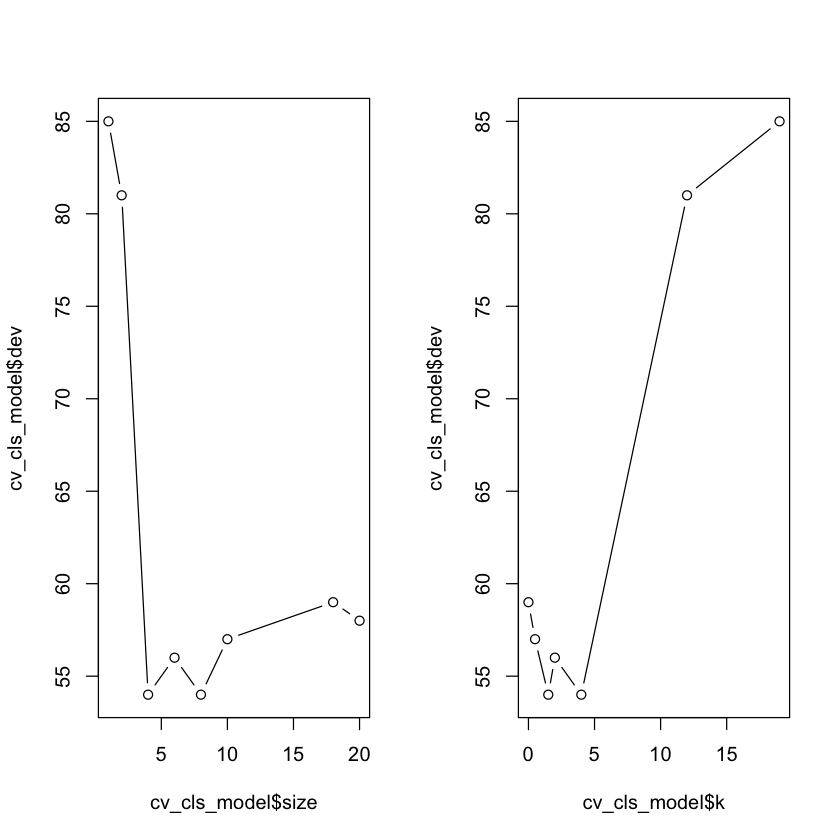

In [4]:
par(mfrow = c(1, 2))
plot(cv_cls_model$size, cv_cls_model$dev, type = "b")   # Terminal nodes ↑ (Large subtree) => Error rate ↓
plot(cv_cls_model$k, cv_cls_model$dev, type = "b")      # Complexity parameter ↑ (Small subtree) => Error rate ↑ 

In [5]:
# Decision Tree - Regression Tree
set.seed(1)
ind = sample(1:nrow(Boston), nrow(Boston) / 2)
mod_data = Boston[ind, ]
prd_data = Boston[-ind, ]
real_y = Boston$medv[-ind]

reg_model = tree(medv ~., mod_data)
summary(reg_model)

pred_y = predict(reg_model, prd_data)
mean((pred_y - real_y) ^ 2)


Regression tree:
tree(formula = medv ~ ., data = mod_data)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

[1] 35.28688

In [6]:
# Tree pruning: Performs cross-validation in order to determine the optimal level of tree complexity
set.seed(2)
cv_reg_model = cv.tree(reg_model)
cv_reg_model   

$size
[1] 7 6 5 4 3 2 1

$dev
[1]  4673.489  4946.843  5464.576  6376.907  6902.219 11294.114 19678.912

$k
[1]       -Inf   203.9641   637.2707   796.1207  1106.4931  3424.7810 10724.5951

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

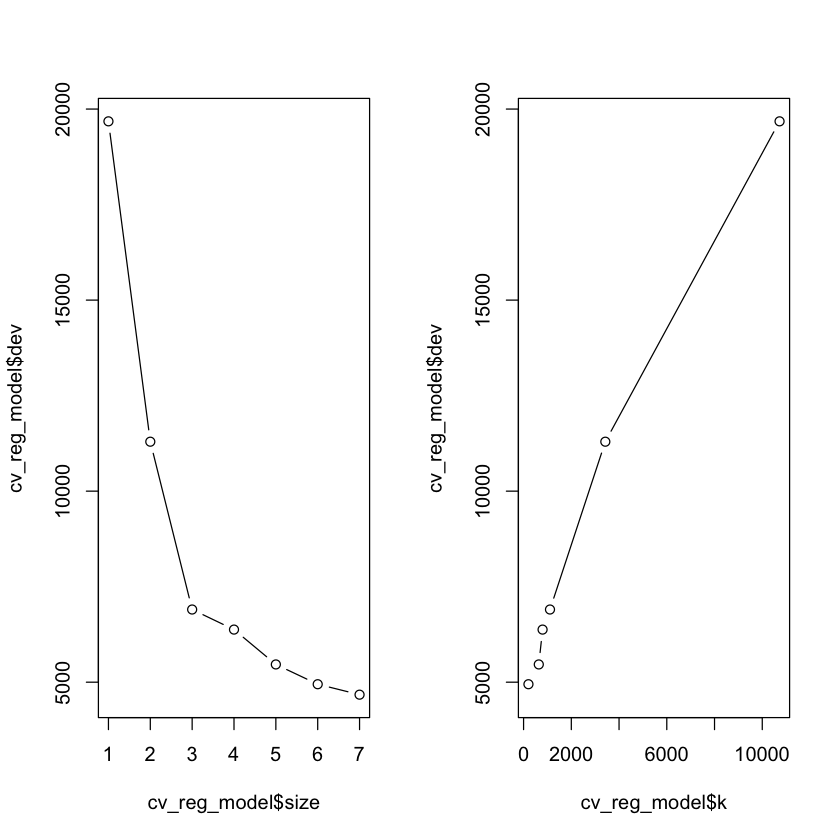

In [7]:
par(mfrow = c(1, 2))
plot(cv_reg_model$size, cv_reg_model$dev, type = "b")   # Terminal nodes ↑ (Large subtree) => Error rate ↓
plot(cv_reg_model$k, cv_reg_model$dev, type = "b")      # Complexity parameter ↑ (Small subtree) => Error rate ↑ 

In [8]:
# Bagging (m = p)
set.seed(1)
ind = sample(1:nrow(Boston), nrow(Boston) / 2)
mod_data = Boston[ind, ]
prd_data = Boston[-ind, ]
real_y = Boston$medv[-ind]

## Arg mtry: Number of variables randomly sampled as candidates at each split (Classification: sqrt(p); Regression: p/3)
## Arg ntree: Number of trees to grow
## Arg importance: Logical indicating whether importance of predictors should be assessed
rf_model_1 = randomForest(medv ~., data = mod_data, mtry = 13, importance = TRUE)
rf_model_1

pred_y = predict(rf_model_1, newdata = prd_data)
mean((pred_y - real_y) ^ 2)


Call:
 randomForest(formula = medv ~ ., data = mod_data, mtry = 13,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.33119
                    % Var explained: 85.26

[1] 23.4579

In [9]:
# Random Forests (m < p)
set.seed(2)
ind = sample(1:nrow(Boston), nrow(Boston) / 2)
mod_data = Boston[ind, ]
prd_data = Boston[-ind, ]
real_y = Boston$medv[-ind]

rf_model_2 = randomForest(medv ~., data = mod_data, mtry = 6, importance = TRUE)
rf_model_2

pred_y = predict(rf_model_2, newdata = prd_data)
mean((pred_y - real_y) ^ 2)


Call:
 randomForest(formula = medv ~ ., data = mod_data, mtry = 6, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 13.59594
                    % Var explained: 84.13

[1] 10.05611

,%IncMSE,IncNodePurity
crim,13.482477,1032.70637
zn,3.471627,86.78367
indus,8.756547,1060.69982
chas,1.154065,57.12515
nox,14.768435,1377.83229
rm,33.701094,6976.15656
age,10.025583,676.43396
dis,16.427300,1582.28294
rad,6.232407,149.12611
tax,10.278576,440.07746


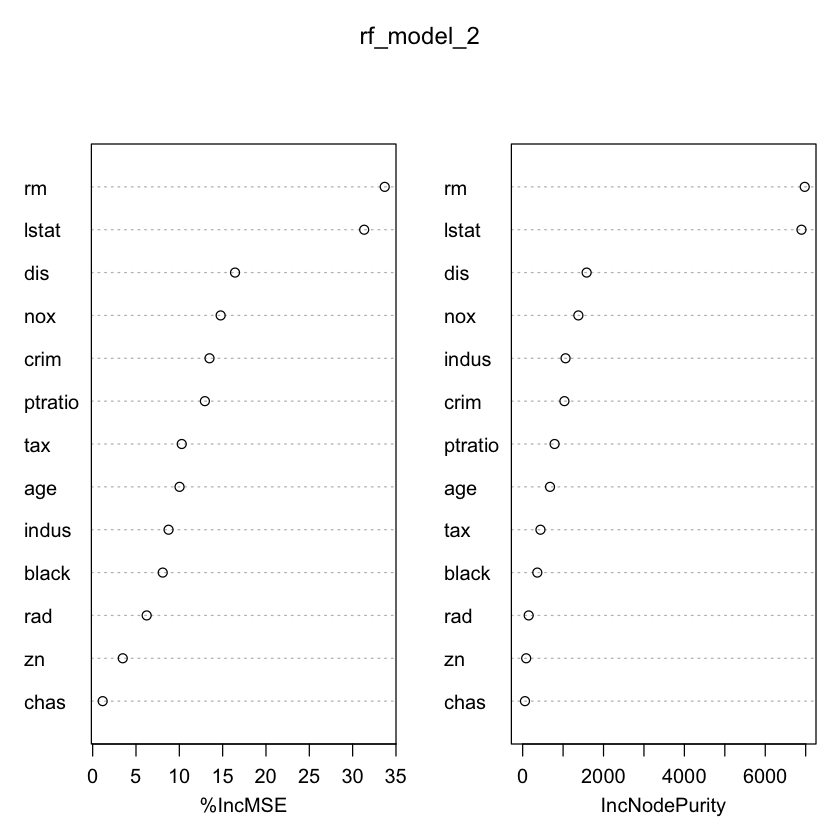

In [10]:
# Variable importance 
## The 1st measure: Mean decrease of accuracy in OOB predictions when a given variable is excluded from the model
## The 2nd measure: Total decrease in node impurities from splitting on the variable, averaged over all trees
importance(rf_model_2)     # The wealth level of the community (lstat)
varImpPlot(rf_model_2)     # The house size (rm)

,var,rel.inf
,<fct>,<dbl>
lstat,lstat,3.916380e+01
rm,rm,2.615589e+01
dis,dis,7.444240e+00
crim,crim,5.860346e+00
nox,nox,4.830698e+00
ptratio,ptratio,4.565629e+00
age,age,4.016312e+00
black,black,3.712105e+00
indus,indus,1.775469e+00


[1] 12.74085

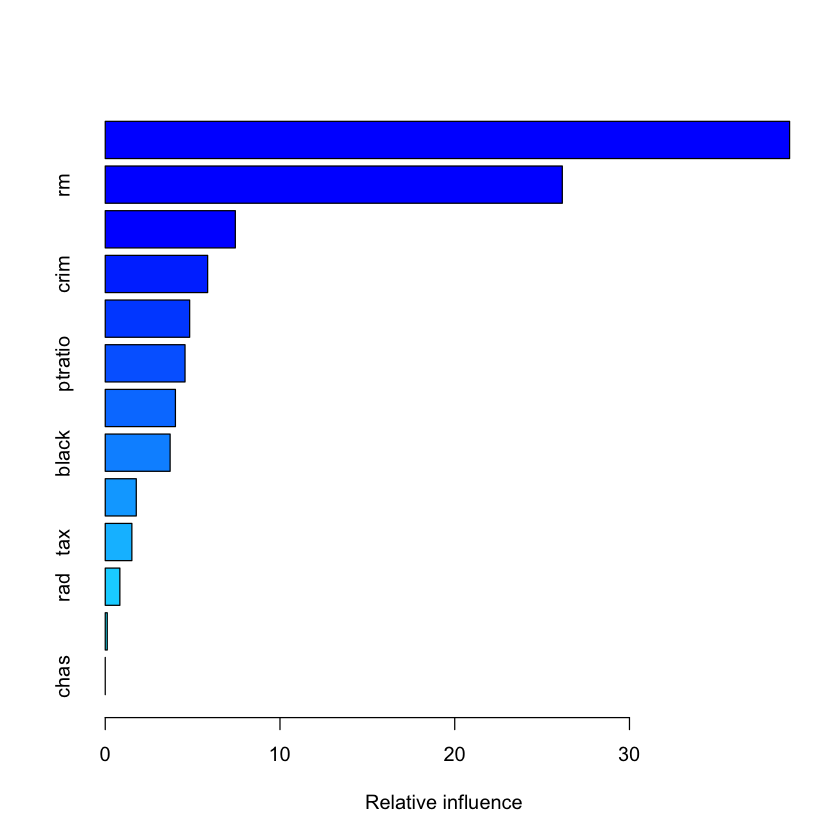

In [11]:
# Boosting
## Arg distribution: 
## If the response has only 2 unique values, bernoulli is assumed
## If the response is a factor, multinomial is assumed
## If the response has class "Surv", coxph is assumed
## Otherwise, gaussian is assumed

## Arg interaction.depth: Integer specifying the maximum depth of each tree
## A value of 1 implies an additive model
## A value of 2 implies a model with up to 2-way interactions

## Arg shrinkage: A shrinkage parameter applied to each tree in the expansion (Learning rate; Step-size reduction)
## A smaller learning rate typically requires more trees
set.seed(3)
ind = sample(1:nrow(Boston), nrow(Boston) / 2)
mod_data = Boston[ind, ]
prd_data = Boston[-ind, ]
real_y = Boston$medv[-ind]

model = gbm(medv ~., data = mod_data, distribution = "gaussian", n.trees = 5000, interaction.depth = 4)
summary(model)

pred_y = predict(model, newdata = prd_data, n.trees = 5000)
mean((pred_y - real_y) ^ 2)

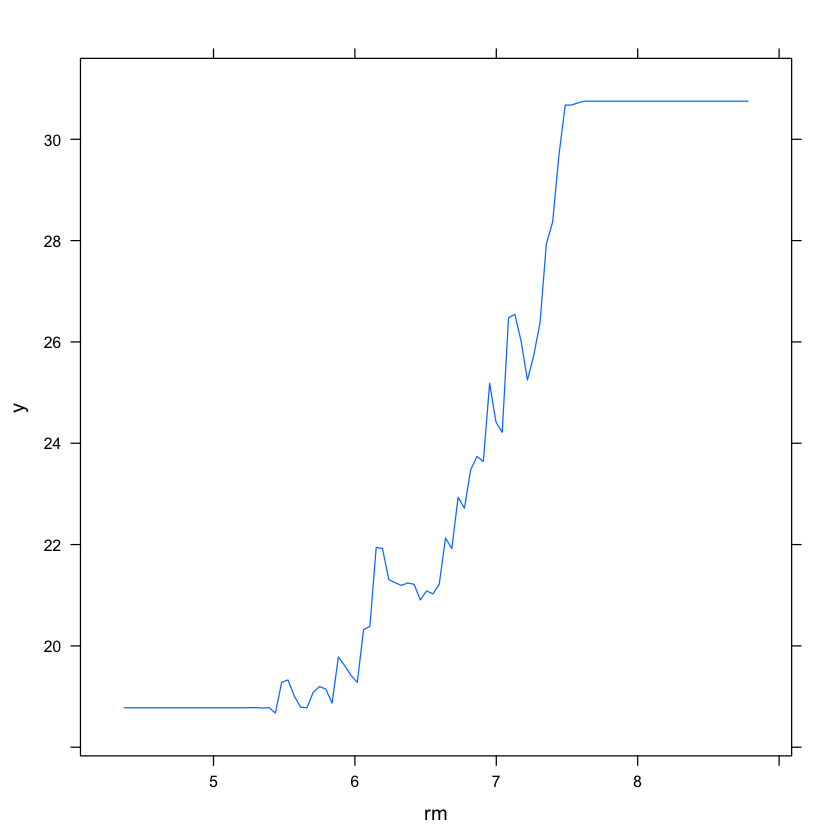

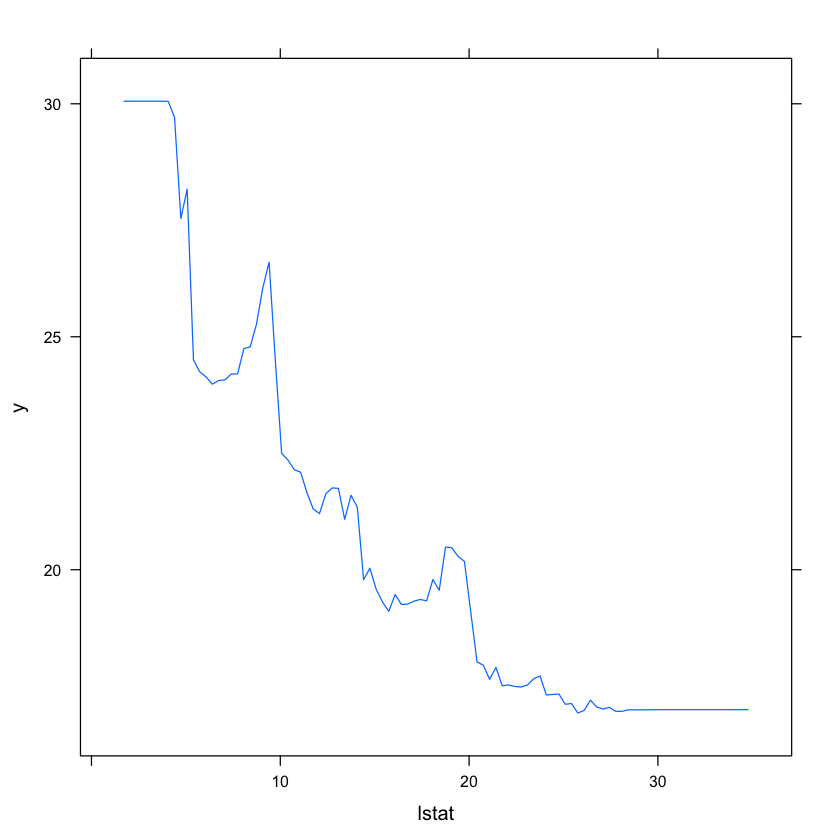

In [12]:
# Partial dependence plots: Marginal effect of the selected variables on the response after integrating out the other variables
par(mfrow = c(1, 2)) 
plot(model, i = "rm")      # Positive association 
plot(model, i = "lstat")   # Negative association